In [ ]:
!pip install contractions
!pip install TextBlob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as npc
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
import contractions
import nltk
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow import keras
import tensorflow as tf

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import re

In [ ]:
"""
Getting information about dataset
"""
cyble_data=pd.read_csv('/content/drive/MyDrive/Datasets/dataset_2_2.csv')


In [ ]:
cyble_data.head()

,Unnamed: 0,Location,Text,Sentiment,Likes,quotes,replies,retweet
0,0,NewYork,Woke criminal New York Times brings back Covid...,Negative,1.0,0.0,1.0,0.0
1,1,NewYork,He proven New York liberal narcissist hired wo...,Negative,1.0,0.0,0.0,0.0
2,2,NewYork,CBS2 News At 11 New York leader say mask vacci...,Neutral,5.0,0.0,0.0,3.0
3,3,NewYork,Pediatric COVID Deaths New York,Neutral,3.0,0.0,0.0,1.0
4,4,NewYork,The 7 day rolling average new Covid hospitaliz...,Negative,2.0,0.0,0.0,0.0


In [ ]:
cyble_data=cyble_data[['Location', 'Text', 'Sentiment']]
cyble_data.head()

,Location,Text,Sentiment
0,NewYork,Woke criminal New York Times brings back Covid...,Negative
1,NewYork,He proven New York liberal narcissist hired wo...,Negative
2,NewYork,CBS2 News At 11 New York leader say mask vacci...,Neutral
3,NewYork,Pediatric COVID Deaths New York,Neutral
4,NewYork,The 7 day rolling average new Covid hospitaliz...,Negative


In [ ]:
cyble_data = cyble_data.rename(columns={'Sentiment': 'Section'})
cyble_data.head()

,Location,Text,Section
0,NewYork,Woke criminal New York Times brings back Covid...,Negative
1,NewYork,He proven New York liberal narcissist hired wo...,Negative
2,NewYork,CBS2 News At 11 New York leader say mask vacci...,Neutral
3,NewYork,Pediatric COVID Deaths New York,Neutral
4,NewYork,The 7 day rolling average new Covid hospitaliz...,Negative


In [ ]:
cyble_data['Location'].value_counts()

Singapore       47340
London          47194
Mumbai          46537
NewYork         46489
Paris           45634
Sydney          44527
Berlin          44465
Tokyo           42635
Johannesburg    24782
Name: Location, dtype: int64

In [ ]:
cyble_data=cyble_data.sample(frac=1)
cyble_data.head()


,Location,Text,Section
123540,Sydney,Health priceless gift I hope cherish it.Anna C...,Positive
178918,Tokyo,Give Javon flower Because understood assignmen...,Neutral
335466,NewYork,Britain Introduces 'Plan B Covid Measures Tack...,Neutral
329558,Johannesburg,Eb5 regional center bill might passed 3/11 den...,Negative
6971,NewYork,I get home COVID test New York want honor test...,Negative


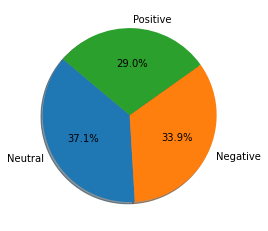

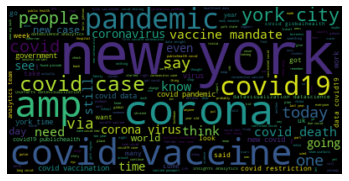

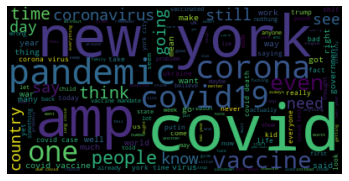

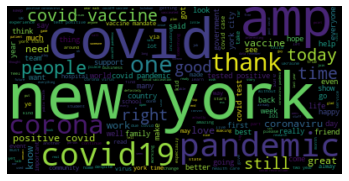

In [ ]:
"""
Dataset Visual analysis
"""
sentiment_count=cyble_data['Section'].value_counts()
plt.pie(sentiment_count, labels=sentiment_count.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

sentiment_list=dict(cyble_data['Section'].value_counts())

"""
Building Wordcloud
"""
for key in sentiment_list:
    distinct_sentiment=cyble_data[cyble_data['Section']==key]
    text1= " ".join(text.lower() for text in distinct_sentiment['Text'] if type(text)==str)
    wordcloud=WordCloud().generate(text1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [ ]:
#text contraction
"""
text contraction means that changing don't to donot etc.'
"""
cyble_data=cyble_data.apply(lambda x: x.astype(str).str.lower())

cyble_data=cyble_data.reset_index(drop=True)

# cyble_data.iloc[1]['Text']
# expanded_text=[]
# for index in range(0, len(cyble_data)):
#     text=cyble_data.iloc[index]['Text']
#     text=contractions.fix(text)
#     expanded_text.append(text)

cyble_data['Text']=cyble_data['Text'].apply(contractions.fix)    

"""
Text Tokenization
"""
from nltk import word_tokenize
from textblob import TextBlob
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words=set(stopwords.words('english'))

# temp_word="My name is krishna yadav"
# temp=TextBlob(temp_word)
# print(temp.words)

def tokenize_text(text,
                  keep_punctuation=False,
                   keep_alphanum=False,
                  keep_stop=False
                  ):
    
    tokenized_list=TextBlob(text)
    tokenized_list=tokenized_list.words
    
    if not keep_punctuation:
        tokenized_list=[token for token in tokenized_list 
                        if token not in string.punctuation]
    
    if not keep_alphanum:
        tokenized_list=[token for token in tokenized_list if token.isalpha()]
        
    if not keep_stop:
        # stop_words=set(stop_words.words('english'))
        tokenized_list=[token for token in tokenized_list if not token in stop_words]
        
    return tokenized_list

# temp_text='Krishna yadav were 7 '
# temp_text=tokenize_text(temp_text)

cyble_data['Text']=cyble_data['Text'].apply(tokenize_text)

In [ ]:
cyble_data['Text'].head()

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

# import nltk
# dler = nltk.downloader.Downloader()
# dler._update_index()
# dler.download('omw-1.4')

def lemmatize_text(text):
    tokenized_list_lematized=[]
    lemmatizer=WordNetLemmatizer()
    for token in text:
        tokenized_list_lematized.append(lemmatizer.lemmatize(token))
    
    return tokenized_list_lematized

# temp_text=['Manager','Managing', 'Management']
# returned_text=lemmatize_text(temp_text)

cyble_data['Text']=cyble_data['Text'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
# Singapore       47340
# London          47194
# Mumbai          46537
# NewYork         46489
# Paris           45634
# Sydney          44527
# Berlin          44465
# Tokyo           42635
# Johannesburg    24782

locations=cyble_data['Location'].unique()
data_list=[]

for location in locations:
  temp=pd.DataFrame(
      
      
  )


In [ ]:
print(locations)

['sydney' 'tokyo' 'newyork' 'johannesburg' 'mumbai' 'london' 'berlin'
 'singapore' 'paris']


In [ ]:
"""
Text Vectorization
"""

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
cyble_data['category']=encoder.fit_transform(cyble_data['Section'])

In [ ]:
x=cyble_data['Text'].tolist()
y=cyble_data['category'].tolist()  

In [ ]:
#onehot representation
# voc_size=10000
voc_size=30000
flattened = []
for sublist in x:
    flattened.append(str(sublist)[1:-1])


onehot_representation=[one_hot(words, voc_size) for words in flattened]
# onehot_representation

In [ ]:
import numpy as np
count=[]
for index in range(len(x)):
    count.append(len(x[index]))

print(np.average(count))

14.495545465512329


In [ ]:
#embedding representaion
sentence_length=20
embedded_result=pad_sequences(onehot_representation, padding='pre', maxlen=sentence_length)

In [ ]:
pd.DataFrame(onehot_representation).head()

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
0,1838.0,25036.0,22216.0,12468.0,3151.0,1838.0,17406.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3216.0,8465.0,2239.0,19714.0,23647.0,9087.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25050.0,17422.0,16974.0,29067.0,13775.0,5585.0,3980.0,12500.0,28993.0,8340.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8733.0,6155.0,16066.0,77.0,5642.0,9608.0,27940.0,16574.0,4646.0,23587.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2552.0,20866.0,29067.0,10666.0,12500.0,28993.0,21668.0,15551.0,21118.0,6452.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
embedded_result.shape

(389603, 20)

In [ ]:
import numpy as np
x_data=np.array(embedded_result)
y_data=np.array(y)

#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
pd.DataFrame(x_train).shape

(311682, 20)

In [ ]:
#second model
feature_vector_embedding=20
model = keras.models.Sequential([
        keras.layers.Embedding(voc_size,feature_vector_embedding, input_length=sentence_length),
        # keras.layers.Dropout(0.5),
        keras.layers.GRU(30, return_sequences=True),
        keras.layers.Dropout(0.5),
        keras.layers.GRU(20, return_sequences=True),
        # keras.layers.Dropout(0.2),
        keras.layers.GRU(10, return_sequences=True),
        keras.layers.GRU(5),
        keras.layers.Dense(3, activation="softmax")
    ])
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=256)

In [ ]:
model.summary()

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

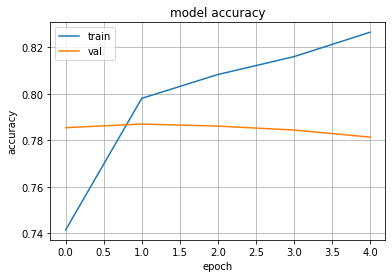

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
#third simplest model to reduce overfitting
from keras.callbacks import EarlyStopping
feature_vector_embedding=20
model = keras.models.Sequential([
        keras.layers.Embedding(voc_size,feature_vector_embedding, input_length=sentence_length),
        # keras.layers.Embedding(voc_size,feature_vector_embedding, input_length=20),
        keras.layers.BatchNormalization(),
        keras.layers.LSTM(20, dropout=0.3, recurrent_dropout=0.3,kernel_regularizer=keras.regularizers.l2(0.0001), return_sequences=True),
        keras.layers.LSTM(20),
        # keras.layers.LSTM(20),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(5, activation="softmax")
    ])
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [ ]:
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=64)